In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lsmt-predictions/predictions.csv
/kaggle/input/masterthesis-01-seniment/__results__.html
/kaggle/input/masterthesis-01-seniment/stock_sentiment.csv
/kaggle/input/masterthesis-01-seniment/sentiment.csv
/kaggle/input/masterthesis-01-seniment/__notebook__.ipynb
/kaggle/input/masterthesis-01-seniment/__output__.json
/kaggle/input/masterthesis-01-seniment/custom.css
/kaggle/input/redditnews/RedditNews_Vader.csv
/kaggle/input/redditnews/RedditNews_FinBert.csv
/kaggle/input/redditnews/upload_DJIA_table_preprocessed.csv
/kaggle/input/masterthesis-03-lstm/__results__.html
/kaggle/input/masterthesis-03-lstm/__notebook__.ipynb
/kaggle/input/masterthesis-03-lstm/__output__.json
/kaggle/input/masterthesis-03-lstm/results.csv
/kaggle/input/masterthesis-03-lstm/predictions.csv
/kaggle/input/masterthesis-03-lstm/custom.css
/kaggle/input/masterthesis-03-lstm/saved_models/FinBERT_Sentiment.h5
/kaggle/input/masterthesis-03-lstm/saved_models/VADER_Sentiment.h5


In [2]:
predictions = pd.read_csv('/kaggle/input/masterthesis-03-lstm/predictions.csv')
results = pd.read_csv('/kaggle/input/masterthesis-03-lstm/results.csv')
# predictions = pd.read_csv('/kaggle/input/lsmt-predictions/predictions.csv')

# Ensure 'Date' is in datetime format
predictions['Date'] = pd.to_datetime(predictions['Date'])

In [3]:
predictions

,Unnamed: 0,Date,Close,FinBERT_Sentiment_predicted,VADER_Sentiment_predicted
0,0,2021-12-13,4668.970215,4705.9600,4609.9575
1,1,2021-12-14,4634.089844,4645.3066,4572.6270
2,2,2021-12-15,4709.850098,4621.7046,4541.4883
3,3,2021-12-16,4668.669922,4689.5034,4607.2680
4,4,2021-12-17,4620.640137,4656.8110,4574.5850
...,...,...,...,...,...
259,259,2022-12-22,3822.389893,3880.3470,3859.7915
260,260,2022-12-23,3844.820068,3810.8372,3806.7588
261,261,2022-12-27,3829.250000,3847.9211,3827.8500
262,262,2022-12-28,3783.219971,3822.8790,3813.3490


In [4]:
# Adjust display settings

pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

display(results[["Unnamed: 0", "RMSE", "MAPE", "R2 Score", "Best Parameters"]])

,Unnamed: 0,RMSE,MAPE,R2 Score,Best Parameters
0,FinBERT_Sentiment,61.489906,0.011726,0.961810,"{'epochs': 112, 'learning_rate': 0.00040305662426767466}"
1,VADER_Sentiment,75.376501,0.014338,0.942613,"{'epochs': 94, 'learning_rate': 0.005947584201901155}"


In [5]:
scenarios = [
#     'No_Sentiment', 
    'FinBERT_Sentiment', 
    'VADER_Sentiment']

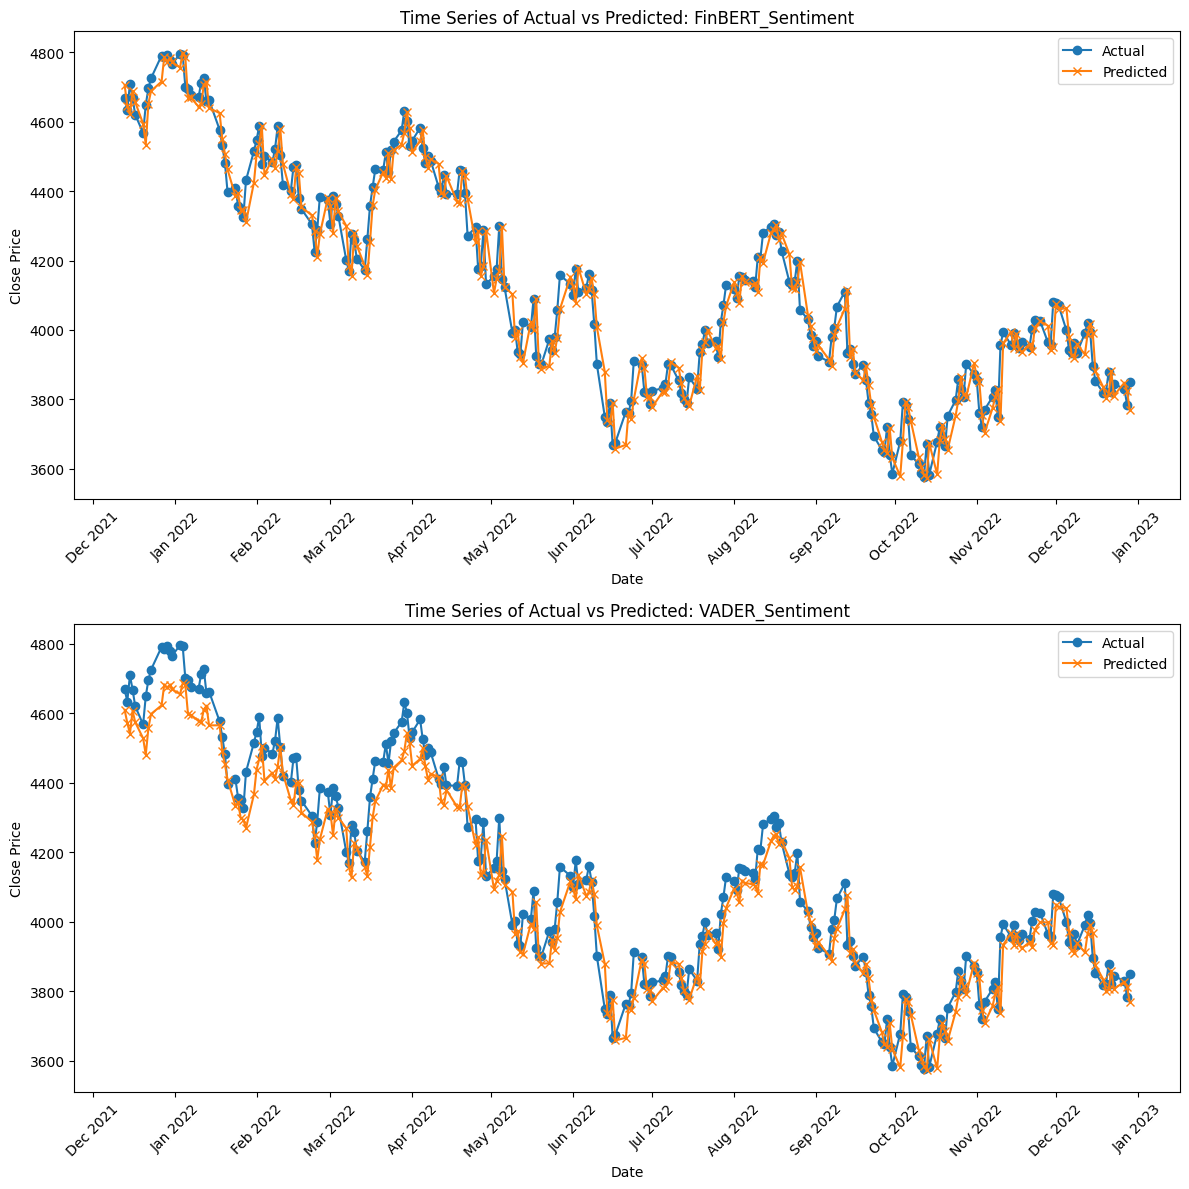

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

def plot_time_series(dates, y_true, y_pred, ax, title):
    ax.plot(dates, y_true, label='Actual', marker='o')
    ax.plot(dates, y_pred, label='Predicted', marker='x')
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    ax.legend()
    
    # Formatting the date axis
    ax.xaxis.set_major_locator(mdates.MonthLocator())  # major ticks every month
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # displaying major ticks as 'Month Year'
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)  # rotating major ticks


fig, axes = plt.subplots(len(scenarios), 1, figsize=(12, 6 * len(scenarios)))


for i, scenario in enumerate(scenarios):
    # Extract date, actual, and predicted values
    dates = predictions['Date']
    y_true = predictions['Close']
    y_pred = predictions[f'{scenario}_predicted']
    
    # Time series plot of actual vs predicted
    plot_time_series(dates, y_true, y_pred, axes[i], f"Time Series of Actual vs Predicted: {scenario}")

plt.tight_layout()
plt.show()


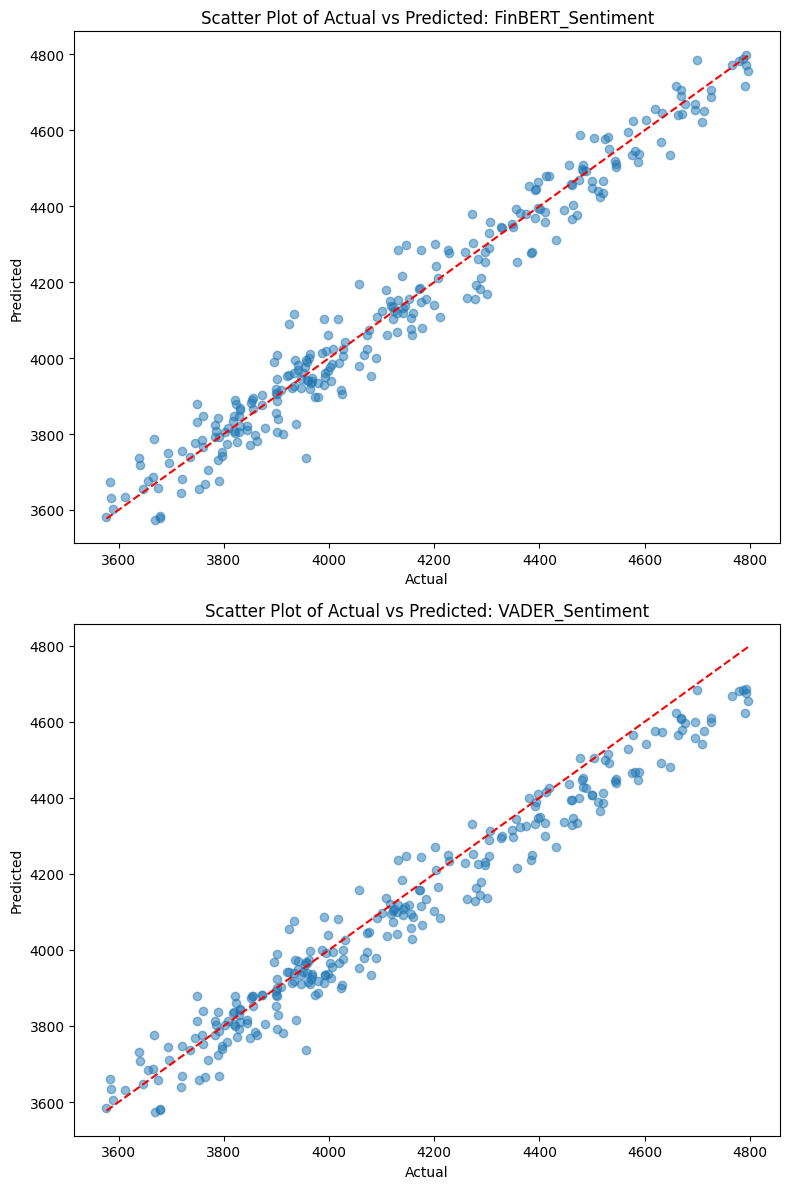

In [7]:
import matplotlib.pyplot as plt

def plot_scatter(y_true, y_pred, ax, title):
    ax.scatter(y_true, y_pred, alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    # Plotting the line of equality
    ax.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    
# Assuming predictions_df contains 'Close' and the predicted values for each scenario
fig, axes = plt.subplots(len(scenarios), 1, figsize=(8, 6 * len(scenarios)))

for i, scenario in enumerate(scenarios):
    # Extract actual and predicted values
    y_true = predictions['Close']
    y_pred = predictions[f'{scenario}_predicted']
    
    # Scatter plot actual vs predicted
    plot_scatter(y_true, y_pred, axes[i], f"Scatter Plot of Actual vs Predicted: {scenario}")

plt.tight_layout()
plt.show()


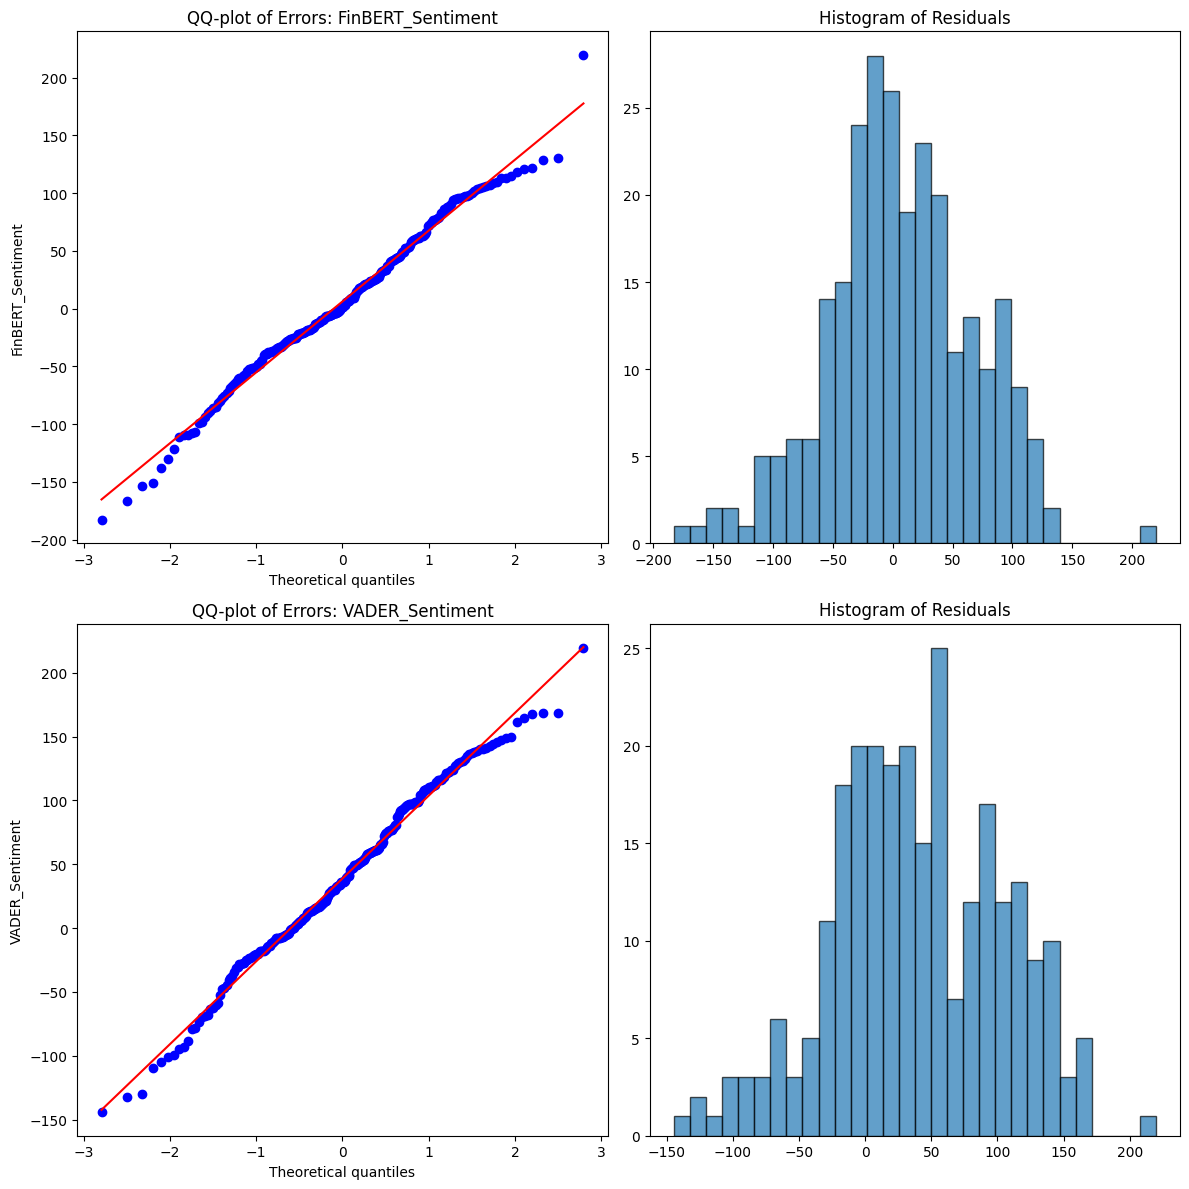

In [8]:
import matplotlib.pyplot as plt
import scipy.stats as stats

def analyze_residuals(y_true, y_pred, ax):
    residuals = y_true - y_pred
    
    # QQ Plot
    stats.probplot(residuals, dist="norm", plot=ax[0])
    ax[0].set_title(f"QQ-plot of Errors: {scenario}")
    
    # Histogram
    ax[1].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
    ax[1].set_title("Histogram of Residuals")
    

fig, axes = plt.subplots(len(scenarios), 2, figsize=(12, 6 * len(scenarios)))

for i, scenario in enumerate(scenarios):
    
    # Extract actual and predicted values
    y_true = predictions['Close']
    y_pred = predictions[f'{scenario}_predicted']
    
    # Run residual analysis
    analyze_residuals(y_true, y_pred, axes[i])
    axes[i, 0].set_ylabel(scenario)
    
plt.tight_layout()
plt.show()



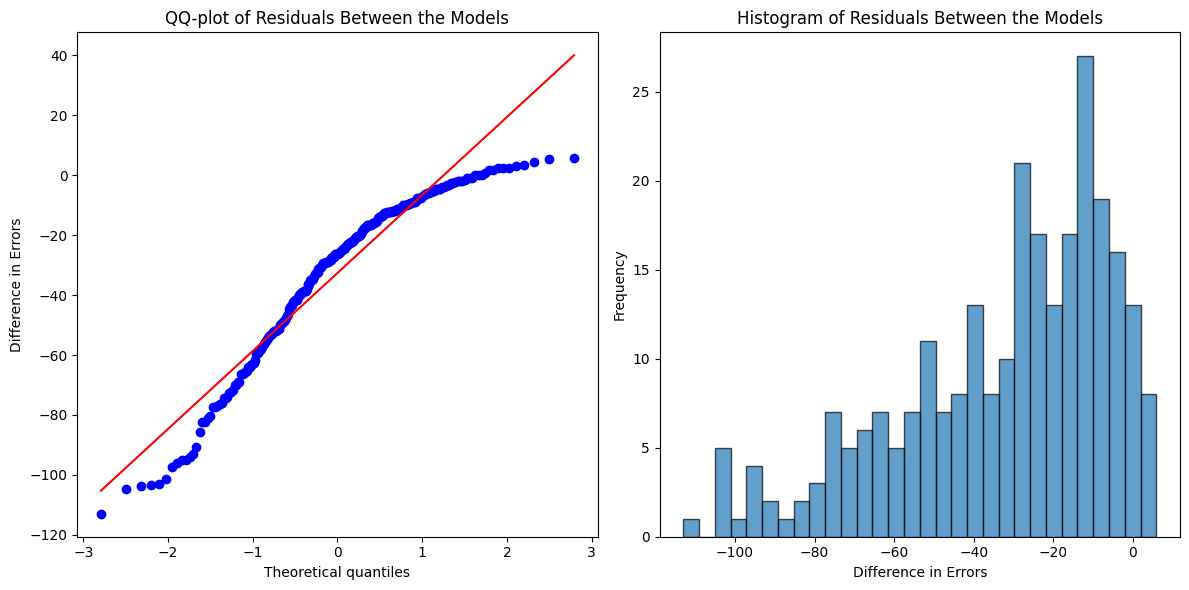

Conducting a Shapiro-Wilk test for normality... 
Shapiro-Wilk statistic: 0.9254933595657349
Shapiro-Wilk p-value: 3.0891803004529095e-10

The data is not normally distributed
Wilcoxon statistic: 217.0
Wilcoxon p-value: 5.523932214711117e-44
There is a statistically significant difference between the models.


In [9]:
import pandas as pd
from scipy import stats

# Assuming your data is in a CSV file called 'data.csv'
data = predictions

# Calculate the errors of predictions from each model
data['FinBERT_error'] = data['Close'] - data['FinBERT_Sentiment_predicted']
data['VADER_error'] = data['Close'] - data['VADER_Sentiment_predicted']

# Calculate the difference in errors between the two models
data['error_diff'] = data['FinBERT_error'] - data['VADER_error']

def analyze_residuals(residuals):
   
    # QQ Plot
    stats.probplot(residuals, dist="norm", plot=axes[0])
    axes[0].set_title("QQ-plot of Residuals Between the Models")
    axes[0].set_ylabel("Difference in Errors")
    
    # Histogram
    axes[1].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
    axes[1].set_title("Histogram of Residuals Between the Models")
    axes[1].set_xlabel("Difference in Errors")
    axes[1].set_ylabel("Frequency")
    

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Run residual analysis
analyze_residuals(data['error_diff'])
    
plt.tight_layout()
plt.show()

# Conduct a Shapiro-Wilk test for normality
shapiro_stat, shapiro_p_value = stats.shapiro(data['error_diff'])

# Output the result of the Shapiro-Wilk test
print('Conducting a Shapiro-Wilk test for normality... ')
print(f'Shapiro-Wilk statistic: {shapiro_stat}')
print(f'Shapiro-Wilk p-value: {shapiro_p_value}')
print('')

# If the p-value is greater than 0.05, the data is normal enough for a paired t-test
if shapiro_p_value > 0.05:
    print('The data is normally distributed')
    # Conduct a paired t-test on the errors
    t_stat, p_value = stats.ttest_rel(data['FinBERT_error'], data['VADER_error'])
    
    # Output the result of the t-test
    print(f'T-statistic: {t_stat}')
    print(f'P-value: {p_value}')
    
    # Interpret the result of the t-test
    alpha = 0.05  # Set significance level
    if p_value < alpha:
        print('There is a statistically significant difference between the models.')
    else:
        print('There is not a statistically significant difference between the models.')
else:
    print('The data is not normally distributed')
        # Conduct a Wilcoxon Signed-Rank Test on the errors
    wilcoxon_stat, wilcoxon_p_value = stats.wilcoxon(data['FinBERT_error'], data['VADER_error'])

    # Output the result of the Wilcoxon Signed-Rank Test
    print(f'Wilcoxon statistic: {wilcoxon_stat}')
    print(f'Wilcoxon p-value: {wilcoxon_p_value}')

    # Interpret the result of the Wilcoxon Signed-Rank Test
    alpha = 0.05  # Set significance level
    if wilcoxon_p_value < alpha:
        print('There is a statistically significant difference between the models.')
    else:
        print('There is not a statistically significant difference between the models.')


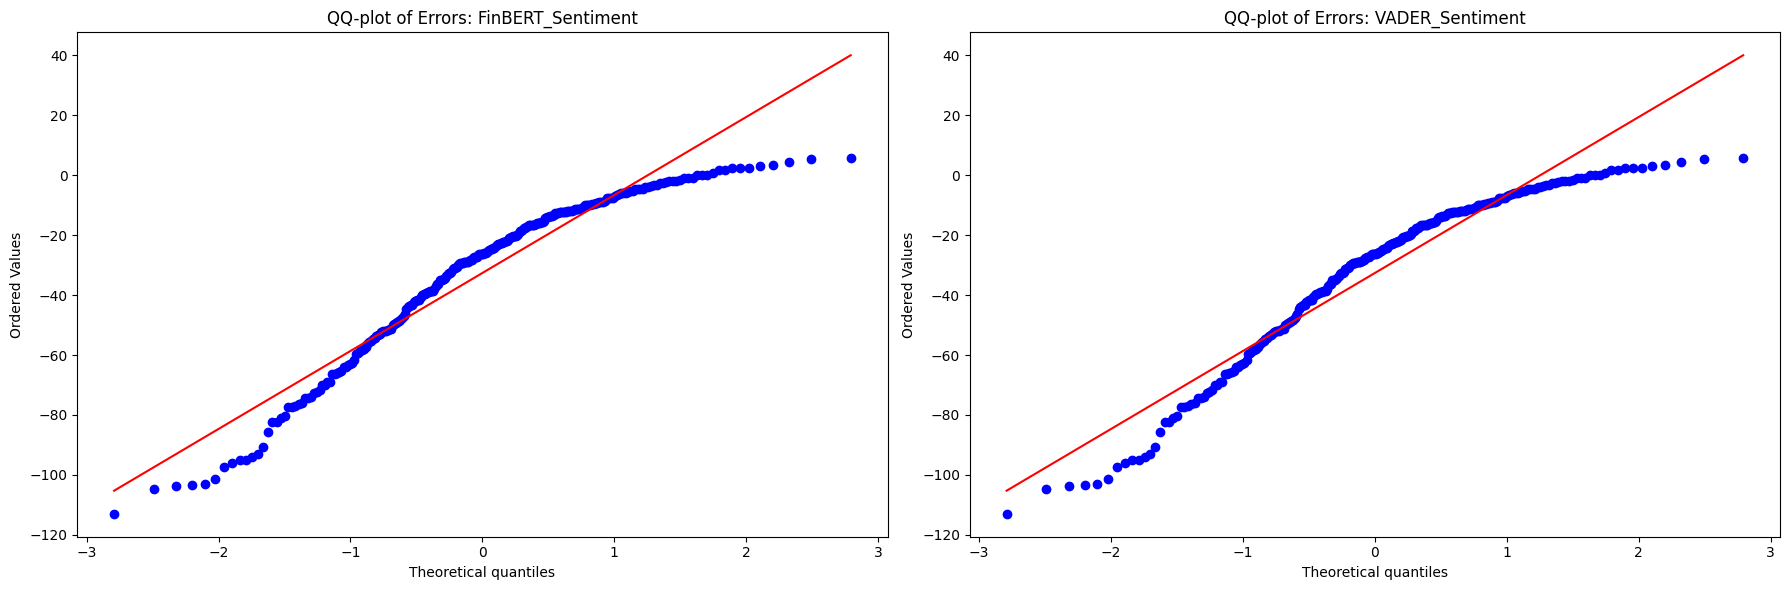

In [10]:
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_qq(residuals, ax, title):
    """
    Plot QQ plot for residuals.
    
    Parameters:
        residuals (pd.Series or np.array): Residuals (errors) from model predictions.
        ax (matplotlib.axes): Matplotlib axes on which to plot.
        title (str): Title for the plot.
    """
    stats.probplot(residuals, dist="norm", plot=ax)
    ax.set_title(title)

# Assuming predictions_df contains 'Date', 'Close', and the predicted values for each scenario
fig, axes = plt.subplots(1, len(scenarios), figsize=(18, 6))

for i, scenario in enumerate(scenarios):
    # Calculate residuals
    y_true = predictions['Close']
    y_pred = predictions[f'{scenario}_predicted']
    residuals = y_true - y_pred
    
    # QQ-plot of residuals
    plot_qq(data['error_diff'], axes[i], f"QQ-plot of Errors: {scenario}")

plt.tight_layout()
plt.show()


In [11]:
import scipy.stats as stats

def perform_dagostino_test(residuals, scenario):
    """
    Perform D'Agostino Test on residuals and print results.
    
    Parameters:
        residuals (pd.Series or np.array): Residuals (errors) from model predictions.
        scenario (str): Name of the scenario (for printing).
    """
    k2, p_value = stats.normaltest(residuals)
    print(f"{scenario}: D’Agostino Test: k2 = {k2:.2f}, p_value = {p_value:.4f}")

for scenario in scenarios:
    # Calculate residuals
    y_true = predictions['Close']
    y_pred = predictions[f'{scenario}_predicted']
    residuals = y_true - y_pred
    
    # Perform D’Agostino Test
    perform_dagostino_test(residuals, scenario)


FinBERT_Sentiment: D’Agostino Test: k2 = 1.82, p_value = 0.4024
VADER_Sentiment: D’Agostino Test: k2 = 1.01, p_value = 0.6047


In [12]:
import scipy.stats as stats

def perform_kruskal_wallis_test(residuals_dict):
    """
    Perform Kruskal-Wallis H Test on residuals and print results.
    
    Parameters:
        residuals_dict (dict): Dictionary with scenario names as keys and residuals as values.
    """
    # Extract residuals
    residuals_list = [residuals for residuals in residuals_dict.values()]
    
    # Perform Kruskal-Wallis H Test
    H_statistic, p_value = stats.kruskal(*residuals_list)
    
    print(f"Kruskal-Wallis H Test: H_statistic = {H_statistic:.2f}, p_value = {p_value:.4f}")


residuals_dict = {}

for scenario in scenarios:
    # Calculate residuals
    y_true = predictions['Close']
    y_pred = predictions[f'{scenario}_predicted']
    residuals = y_true - y_pred
    
    # Store residuals in dictionary
    residuals_dict[scenario] = residuals
    
# Perform Kruskal-Wallis H Test
perform_kruskal_wallis_test(residuals_dict)


Kruskal-Wallis H Test: H_statistic = 33.76, p_value = 0.0000


In [13]:
from itertools import combinations

def perform_pairwise_mann_whitney_u_test(residuals_dict):
    """
    Perform pairwise Mann-Whitney U Tests on residuals and print results.
    
    Parameters:
        residuals_dict (dict): Dictionary with scenario names as keys and residuals as values.
    """
    # Get all combinations of scenarios
    scenario_combinations = combinations(residuals_dict.keys(), 2)
    
    for scenario1, scenario2 in scenario_combinations:
        # Perform Mann-Whitney U Test
        U_statistic, p_value = stats.mannwhitneyu(residuals_dict[scenario1], residuals_dict[scenario2])
        
        print(f"Mann-Whitney U Test between {scenario1} and {scenario2}: U_statistic = {U_statistic:.2f}, p_value = {p_value:.4f}")

# Assuming residuals_dict is previously defined
# Perform pairwise Mann-Whitney U Tests
perform_pairwise_mann_whitney_u_test(residuals_dict)


Mann-Whitney U Test between FinBERT_Sentiment and VADER_Sentiment: U_statistic = 24663.00, p_value = 0.0000
